## Assignment-Worked example:

## Abstract: 

For this project, we must supply the dataset and code it in accordance with our comprehension of the data from the prior assignment. In order to grasp the data on two datasets—one that is related to our issue and the other that is unrelated to it—we must build identical code and respond to similar inquiries. The first dataset I have is on apple quality, while the second one is about diabetes prediction in Central Asia.

## Description of the Project:

Our goal is to use the dataset's observations to forecast an employee's pay. We must understand the domain information, which will be supplied in the next steps, in order to be able to anticipate it accurately.

## Attributes of the dataset:

1.Name:Name of the employee.


2.job_title: The position held during the course of the year.


3.Agency-Id:Unique Id given to the employee.


4.Agency:Agency or location at which the employee is working.


5.Grosspay: The entire amount earned in gross pay.


6.Anuual salary:The pay amount expressed in ISO 4217 currency code.


7.Hiredate:The date at which the employee joined the company.

## Question 1 : What is the question being researched?

The aim of this research is to develop a predictive model that can accurately estimate an adult's income level by taking into account a range of demographic and socioeconomic variables. Our goal is to create a strong model that can reliably categorize people into various income groups (such as high- and low-income groups) using machine learning techniques and the given attributes.

The integration of numerous Python packages necessary for data processing and visualization marks the beginning of the investigation:

1.NumPy: This library provides strong support for huge, multi-dimensional arrays and matrices, making it indispensable for numerical computations. It is frequently used to conduct mathematical operations on arrays in data analysis.

2.Pandas:Pandas is a strong Python toolkit for data analysis and manipulation.For managing and evaluating structured data, it offers data structures like DataFrame and Series.Data cleaning, investigation, and reading/writing are all made easier using Pandas.

3.Matplotlib: It is a widely used Python charting toolkit that may be used to create static, animated, and interactive displays.
A Matplotlib module called pylab unifies NumPy and Matplotlib into a single namespace.It is frequently employed in the creation of graphs, charts, and other visualizations.

4.Seaborn:Matplotlib is the foundation for the statistical data visualization library Seaborn.It offers a sophisticated drawing tool for creating eye-catching and educational statistical visuals.The task of producing visually appealing visualizations is made easier with Seaborn.

5.%matplotlib inline is another tool used by the notebook to guarantee that figures created with matplotlib appear inline within notebook cells. As part of the notebook's output, this method makes plots more easily visualized.

The goal of the research is to create a model that, given specific input features, can predict or estimate the income level.
It seems likely that this model is a machine learning model, which suggests that algorithms are used to examine patterns and provide predictions.

In [1]:
# Importing necessary libraries for data manipulation and analysis
import numpy as np 
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pylab as plt
import seaborn as sns

# Importing libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Importing libraries for machine learning models, training, and testing
from sklearn.model_selection import train_test_split

# Importing libraries for machine learning pipelines and model evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

#Importing Libararies for statistical modeling and analysis.
import statsmodels.api as sm

#Importing the Casual Model.
from causalinference import CausalModel
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/NgoluaStanley/Employee_Salary_Prediction/main/Baltimore_salaries.csv")
data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [3]:
#A brief description of the DataFrame,including details on the data types, non-null values,and memory utilization,is given by 
#the info() method.
data.info()
#There are 18981 rows in the data setand there are 7 columns in the data set provided,all the columns are of type Object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


## Explaination of Above Output:
A useful tool for rapidly evaluating a DataFrame's properties and structure is the info() method.

For each column, the output provides information about its name, non-null count, and data type:

1.Job Title to Grosspay:These are Column names.

2.18981 non-null: Number of non-null (non-missing) values for each column.

3.object: Data type of each column,object indicates text or categorical data.

In [4]:
#To find a Pandas DataFrame's dimensions, use the df.shape attribute.The number of rows and columns in the DataFrame is returned
#as a tuple. Df.shape in our instance shows that our DataFrame has 15 columns and 32,561 rows.
data.shape

(18981, 7)

In [5]:
# To find the number of non-null (non-missing) values in each column of a DataFrame,df.count() method is used.
# It gives back a Series with the counts for every column.
data.count()

 Name           18981
JobTitle        18981
AgencyID        18981
Agency          18981
HireDate        18911
AnnualSalary    18981
GrossPay        15758
dtype: int64

## Expalination of Above Output:

- **Name:** This column contains 18,981 entries (data points), as indicated by the count of 18,981.
- **JobTitle:** Similarly, the JobTitle column also has 18,981 entries.
- **AgencyID:** The AgencyID column contains 18,981 entries.
- **Agency:** The Agency column also contains 18,981 entries.
- **HireDate:** This column has 18,911 entries, which is slightly less than the other columns, indicating that there are some missing or null values in this column.
- **AnnualSalary:** Like the other columns, the AnnualSalary column contains 18,981 entries.
- **GrossPay:** The GrossPay column has 15,758 entries, which is significantly less than the total number of entries in the other columns. This suggests that there are more missing or null values in the GrossPay column compared to the other columns.


In [6]:
# A overview of the statistical measures for each numerical column in the DataFrame is given by the df.describe() method.
# It comprises the following: minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), mean, 
# standard deviation, and count.
data.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


## Explaination of Above Output:

- **Name:** This column has a size of 18,981, which represents the total number of entries (data points) in the column.
- **JobTitle:** Similarly, the JobTitle column also has a size of 18,981.
- **AgencyID:** The AgencyID column has a size of 18,981 as well.
- **Agency:** The Agency column also has a size of 18,981.
- **HireDate:** This column has a size of 18,911, which is slightly less than the other columns, indicating that there are some missing or null values in this column.
- **AnnualSalary:** Like the other columns, the AnnualSalary column has a size of 18,981.
- **GrossPay:** The GrossPay column has a size of 15,758, which is significantly less than the total size of the other columns. This suggests that there are more missing or null values in the GrossPay column compared to the other columns.


In [7]:
#The df.isnull().sum() expression is used to count the number of missing values (null or NaN) in each column of a Pandas
#DataFrame. It returns a Series containing the count of missing values for each column.
data.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

The output indicates the number of null (missing) values in each column of the dataset:

- **Name:** There are 0 null values in the Name column.
- **JobTitle:** There are 0 null values in the JobTitle column.
- **AgencyID:** There are 0 null values in the AgencyID column.
- **Agency:** There are 0 null values in the Agency column.
- **HireDate:** There are 70 null values in the HireDate column.
- **AnnualSalary:** There are 0 null values in the AnnualSalary column.
- **GrossPay:** There are 3223 null values in the GrossPay column.


In [8]:
#HireDate has 70 null values, or less than 1% of all values,therefore removing those rows.
data.dropna(subset=['HireDate'])

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [9]:
#HireDate has 3223 null values, or less than 5% of all values,therefore removing those rows.
data.dropna(subset=['GrossPay'])

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18974,"Zoppo,Catherine B",REAL ESTATE AGENT I,A15001,COMP-Real Estate,03/14/1977,$58313.00,$58359.66
18975,"Zorbach,Michael K",POLICE OFFICER,A99224,Police Department,05/02/2012,$44104.00,$48915.33
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [10]:
#The df.isnull().sum() expression is used to count the number of missing values (null or NaN) in each column of a Pandas
#DataFrame. It returns a Series containing the count of missing values for each column.
data.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

The output indicates the number of null (missing) values in each column of the dataset:

- **Name:** There are 0 null values in the Name column.
- **JobTitle:** There are 0 null values in the JobTitle column.
- **AgencyID:** There are 0 null values in the AgencyID column.
- **Agency:** There are 0 null values in the Agency column.
- **HireDate:** There are 70 null values in the HireDate column.
- **AnnualSalary:** There are 0 null values in the AnnualSalary column.
- **GrossPay:** There are 3223 null values in the GrossPay column.


In [11]:
#Determing Value_counts for AgencyID
data.AgencyID.value_counts()
# In Blatimore, there are 1177 agencies.We should have the same number of Agencies since, in general,
# AgencyID represents an Agency.

AgencyID
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02539      1
A65052      1
W02106      1
W02590      1
W02339      1
Name: count, Length: 1177, dtype: int64

## Explanation of Above Output:
AgencyID: This column contains unique identifiers for different agencies. The count next to each AgencyID represents the number of times that particular AgencyID appears in the dataset.

For example:
- AgencyID "P04001" appears 316 times in the dataset.
- AgencyID "C90786" appears 276 times.
- AgencyID "W02629" appears 193 times.
- AgencyID "P04002" appears 191 times.
- AgencyID "A99416" appears 166 times.
- ...

This information gives insight into the distribution of data across different agencies based on their unique identifiers, showing which agencies are more frequently represented in the dataset and which ones are less common.


In [12]:
#Determining Value_counts for Agency
data.Agency.value_counts()
#Against general expectations,A single Agency seems to have different Agency ID's which might be given
#based on Job Role and Agency.

Agency
Youth Summer                4323
Police Department           3211
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: count, Length: 65, dtype: int64

## Explanation of Above Output:

Agency: This column contains different agency names or departments. The count next to each agency name represents the number of times that particular agency appears in the dataset.

For example:
- Agency "Youth Summer" appears 4323 times in the dataset.
- Agency "Police Department" appears 3211 times.
- Agency "Fire Department" appears 1576 times.
- Agency "DPW-Water & Waste Water" appears 1491 times.
- Agency "HLTH-Health Department" appears 833 times.
- ...

This information provides insights into the distribution of data across different agencies or departments, showing which ones are more frequently represented in the dataset and which ones are less common.


In [13]:
#Determining Value_counts for JobTitle
data.JobTitle.value_counts()
#There are 1073 Job title that are available.

JobTitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
VEHICLE DAMAGE INVESTIGATOR          1
Community Health Nurse I             1
ACCOUNTING SYSTEMS ANALYST           1
DESK TOP PUBLISHING COORDINATO       1
Research Analyst II                  1
Name: count, Length: 1075, dtype: int64

## Explaination for the above code:

JobTitle: This column contains different job titles or positions held by individuals. The count next to each job title represents the number of times that particular job title appears in the dataset.

For example:
- Job title "AIDE BLUE CHIP" appears 4817 times in the dataset.
- Job title "POLICE OFFICER" appears 1866 times.
- Job title "LABORER (Hourly)" appears 597 times.
- Job title "EMT Firefighter Suppression" appears 358 times.
- Job title "CROSSING GUARD" appears 337 times.
- ...

This information provides insights into the distribution of job titles across the dataset, showing which job titles are more frequently held by individuals and which ones are less common.


In [14]:
#Determining Value counts on HireDate
data.HireDate.value_counts()
#On May 21, 2014, a greater number of individuals are chosen,The date format is MM/DD/YYYY.

HireDate
05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
02/13/2009       1
08/12/1993       1
02/09/1998       1
05/06/1980       1
10/15/1979       1
Name: count, Length: 4737, dtype: int64

## Explaination for the above code:
HireDate: This column contains different hire dates of employees. The count next to each hire date represents the number of times that particular hire date appears in the dataset.

For example:
- Hire date "05/21/2014" appears 1478 times in the dataset.
- Hire date "06/10/2013" appears 696 times.
- Hire date "06/12/2012" appears 541 times.
- Hire date "06/07/2011" appears 368 times.
- Hire date "05/29/2014" appears 347 times.
- ...

This information provides insights into the distribution of hire dates among employees, showing which hire dates are more common and which ones are less common.


In [15]:
#Determining Value counts on Annual Salary
data.AnnualSalary.value_counts()

AnnualSalary
$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      163
              ... 
$116300.00       1
$83500.00        1
$40994.00        1
$42846.00        1
$900.00          1
Name: count, Length: 1590, dtype: int64

In [16]:
#The dollar symbol "Annual Salary" has to be removed in order to convert it to an integer format.
# Removing $ from Annual Salary and converting it into Integer format
data['AnnualSalary'] = data['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [17]:
#Determining Value counts on Annual Salary
data.AnnualSalary.value_counts()

AnnualSalary
11310.0     4811
20800.0      325
29245.0      196
43999.0      169
44773.0      163
            ... 
116300.0       1
83500.0        1
40994.0        1
42846.0        1
900.0          1
Name: count, Length: 1590, dtype: int64

In [18]:
# A overview of the statistical measures for each numerical column in the DataFrame is given by the df.describe() method.
# It comprises the following: minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), mean, 
# standard deviation, and count.
data.AnnualSalary.describe()

count     18981.000000
mean      39756.791968
std       25173.051216
min           0.000000
25%       11310.000000
50%       36400.000000
75%       60598.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

- **Count:** This parameter indicates the total number of data points (or entries) in the "AnnualSalary" column. In this case, there are 18,981 entries.

- **Mean:** The mean (or average) is the sum of all values in the "AnnualSalary" column divided by the count of values. It gives an indication of the central tendency of the salary data.

- **Standard Deviation:** The standard deviation measures the dispersion or spread of the salary values around the mean. A higher standard deviation indicates that the salaries are more spread out from the average.

- **Minimum Salary:** This parameter represents the smallest value in the "AnnualSalary" column. It shows the lowest recorded salary in the dataset.

- **25th Percentile (Q1):** The 25th percentile, also known as the first quartile (Q1), indicates the value below which 25% of the salaries fall. It represents the lower end of the salary distribution.

- **Median (50th Percentile):** The median is the middle value in a sorted list of salaries. It divides the data into two equal halves, with half of the salaries above and half below this value.

- **75th Percentile (Q3):** The 75th percentile, also known as the third quartile (Q3), indicates the value below which 75% of the salaries fall. It represents the upper end of the salary distribution.

- **Maximum Salary:** This parameter represents the largest value in the "AnnualSalary" column. It shows the highest recorded salary in the dataset.


C:\Users\vaish\AppData\Local\Temp\ipykernel_38476\1517985553.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.AnnualSalary)
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


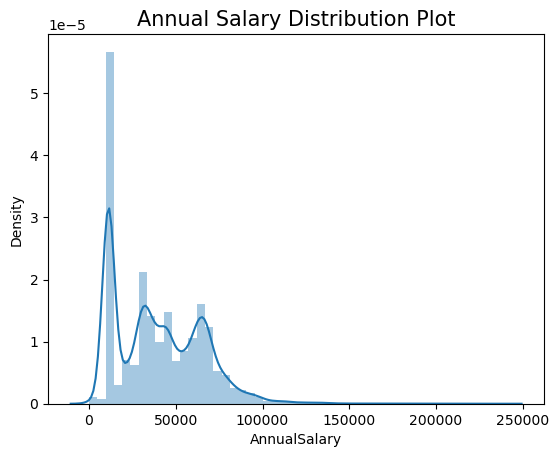

In [19]:
#Leaving it alone since all of the data points over the 75% line are quite close to one another.
#After completing the data preparation, let's move on to the following phase.
sns.distplot(data.AnnualSalary)
plt.title("Annual Salary Distribution Plot",fontsize=15)
plt.show()
#There don't seem to be many people making above $100,000 each year, and the data is dispersed somewhat arbitrarily.

Distribution plots show how frequently a variable occurs across different ranges. In this case, the x-axis represents annual salary, and the y-axis represents density. 

The density curve of the distribution plot reveals that:
- There are more employees at lower annual salary ranges.
- The curve starts to flatten out around $150,000, suggesting that there are fewer employees with very high salaries.


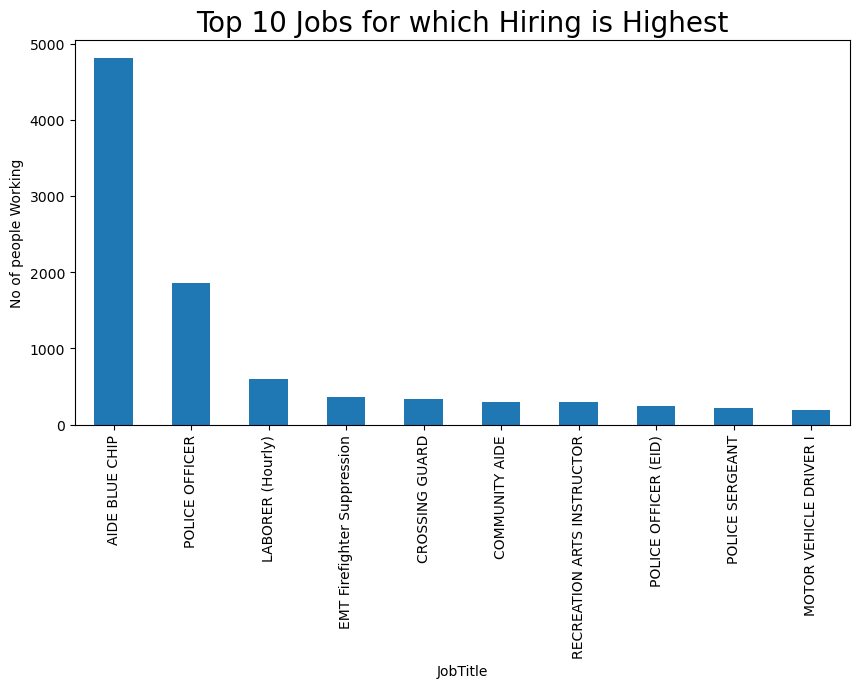

In [20]:
#Top 10 Jobs based on the hiring.
plt.figure(figsize=(10,5))
data.groupby(['JobTitle'])[' Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=20)
plt.show()

### Top 10 Jobs for which Hiring is Highest

A pictograph uses symbols to represent data. In this case, each blue stick figure represents 1,000 people working in that job.

#### Graph Details:
- Title: Top 10 Jobs for which Hiring is Highest
- Y-axis: Number of people working in that job title (Scale: 0 to 5,000)
- X-axis: Different job titles

#### Top 5 Jobs Listed on the Graph (From Most to Least Hiring):
1. Aide Blue Chip
2. Police Officer
3. Laborer (Hourly)
4. Firefighter Suppression
5. Crossing Guard


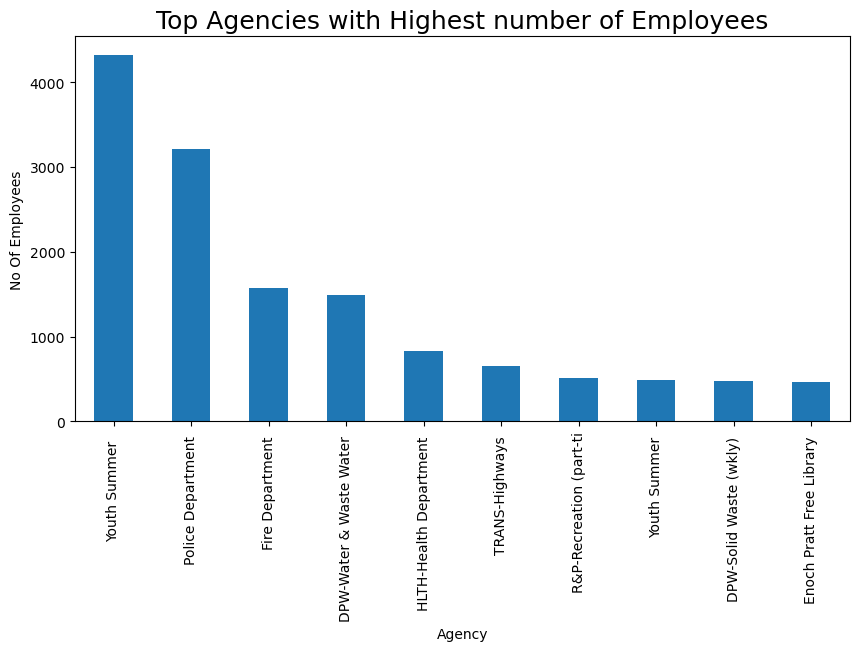

In [21]:
#Agencies with the highest number of employees.
plt.figure(figsize=(10,5))
data.groupby(['Agency'])[' Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=18)
plt.show()

It depicts the number of employees working in various departments of a specific government agency.

A pictograph uses symbols to represent data. In this case, each symbol (like a house for Public Works or a fire truck for Fire Department) represents a certain number of employees. The number of employees each symbol represents is not provided in the image itself.

The y-axis shows the number of employees. The scale goes from 1,000 to 4,000 employees.

The x-axis lists the different departments of the agency.

Here are some of the departments listed on the graph, from most to least employees:

- Youth Summer
- Police Department
- Fire Department
- Water & Waste Water
- Health Department
- Public Works
- Parks & Recreation (part-time)

In [22]:
data.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

### Label Encoding.

In this part of the we are converting all the categorical values into numeric values with the help of Label Encoding.
Label Encoding is a preprocessing technique used in machine learning to convert categorical data into numerical form. In this technique, each unique category (label) in the categorical variable is assigned an integer value. This transformation is useful when working with machine learning algorithms that require numerical input, as they typically do not handle categorical data directly.
Then we will spilt the data and apply different models of the data.

In [23]:
le = LabelEncoder()

# Perform label encoding for each column
data[' Name'] = le.fit_transform(data[' Name'])
data['JobTitle'] = le.fit_transform(data['JobTitle'])
data['AgencyID'] = le.fit_transform(data['AgencyID'])
data['Agency'] = le.fit_transform(data['Agency'])
data['HireDate'] = le.fit_transform(data['HireDate'])
data['AnnualSalary'] = le.fit_transform(data['AnnualSalary'])
data['GrossPay'] = le.fit_transform(data['GrossPay'])

data

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,0,30,753,63,2035,22,12765
1,1,418,12,44,3887,765,7452
2,2,50,107,55,3492,1038,9904
3,3,368,317,24,2629,913,8464
4,4,748,616,47,2646,546,4844
...,...,...,...,...,...,...,...
18976,18781,30,786,63,1779,22,13732
18977,18782,30,1109,62,1779,22,13732
18978,18783,748,616,47,4593,546,1566
18979,18784,746,544,47,281,549,6592


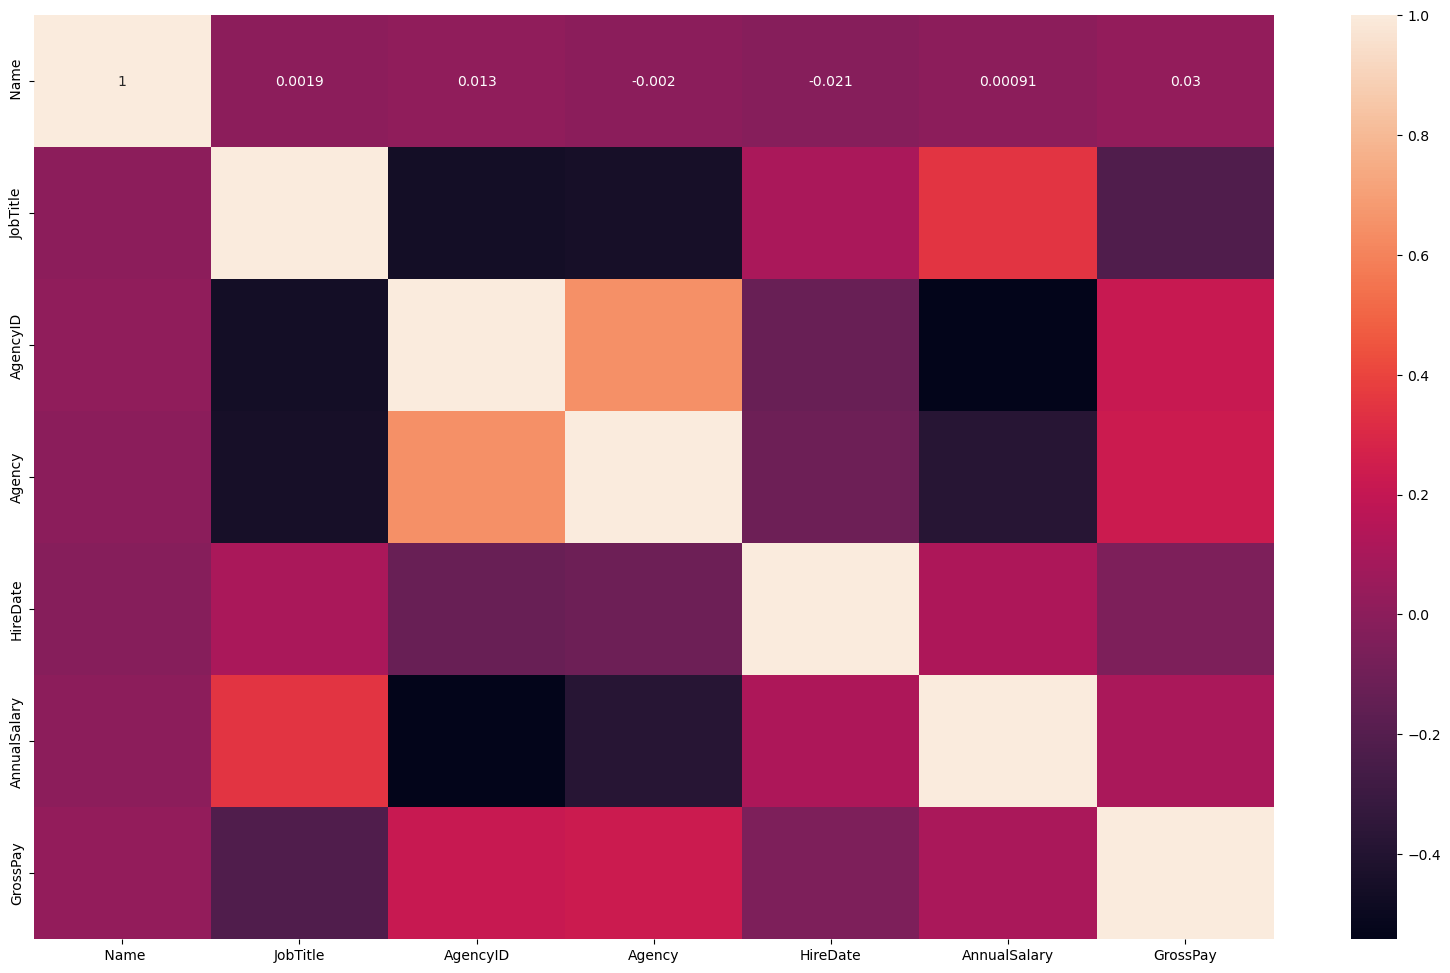

In [24]:
# Check colinearity among data columns
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

## Understanding Correlation Coefficients

In a dataset, each row and column represent a variable. The value at the intersection of a row (variable i) and column (variable j) represents the correlation coefficient between variable i and variable j.

- The correlation coefficient ranges from -1 to +1.
  - A value of +1 indicates a perfect positive correlation, where the two variables increase or decrease together in a linear fashion.
  - A value of -1 indicates a perfect negative correlation, where as one variable increases, the other variable decreases in a linear fashion.
  - A value of 0 indicates no linear correlation between the variables.

Correlation coefficients provide insights into the strength and direction of relationships between variables, helping analysts understand how variables relate to each other within the dataset.


In [25]:
#Categorising the data into train and test data:

#Including all the attributes except income that is the independent variables.
X = data.drop('AnnualSalary', axis=1)

# Including the dependent variable.
Y = data['AnnualSalary']

#Splitting the data into train and test that is 80% of data is training data and remaining 20% is testing data.
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X, Y ,test_size = 0.2, random_state=42)

In [26]:
print("\nX Training Data is\n", len(X_Train), "\n", X_Train)
print("\nX Testing Data is\n", len(X_Test), "\n", X_Test)
print("\nY Training Data is\n", len(Y_Train), "\n", Y_Train)
print("\nY Testing Data is\n", len(Y_Test), "\n", Y_Test)


X Training Data is
 15184 
         Name  JobTitle  AgencyID  Agency  HireDate  GrossPay
10794  10687       518       195      11      3645      7027
15186  15039       451       244      22      4152     10393
10097   9999       629       125       4      2672       692
9414    9318         1       146      39      2619      2585
5903    5850      1065       196      11      4721     12640
...      ...       ...       ...     ...       ...       ...
11284  11131       537       642      10       733      2811
11964  11851       119       144      39      3591      6428
5390    5341        30       865      63      2062       325
860      919       859       392       9      1101      1733
15795  15639        30      1109      62      1967     13732

[15184 rows x 6 columns]

X Testing Data is
 3797 
         Name  JobTitle  AgencyID  Agency  HireDate  GrossPay
15448  15300       377        22      44       180      1057
16204  16041       431       279      22       472     12540
906

## Linear Regression:
A linear relationship between an independent and dependent variable is provided by the linear regression technique, which is used to forecast the course of future occurrences. Predictive analysis is done using this statistical technique in data science and machine learning.

Another name for the independent variable is the predictor or explanatory variable that doesn't change when other variables do. Nonetheless, variations in the independent variable have an impact on the dependent variable. Regression analysis uses a model to predict the value of the dependent variable, which is the response or outcome variable under investigation.

In [27]:
# Implementing Linear Regression to analyze potential causal relationships
model = LinearRegression()
model.fit(X_Train,Y_Train)

LinearRegression()

In [28]:
# Evaluating the model's performance
predictions = model.predict(X_Test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f'Mean Squared Error: {mean_squared_error(Y_Test, predictions)}')

Coefficients: [-4.07218935e-04  1.99393948e-01 -7.15796202e-01 -1.08571562e+00
  1.81397088e-02  2.44869171e-02]
Intercept: 565.9708152999372
Mean Squared Error: 125738.65915641598


### Model Evaluation Results

#### Coefficients:
- Name: -9.66676576e-04
- JobTitle: 2.99532227e-01
- AgencyID: -7.02707113e-01
- Agency: -1.39519023e+00
- HireDate: 1.68736866e-02
- GrossPay: 2.90881417e-02

#### Intercept:
- Intercept Value: 588.673863322164

#### Mean Squared Error (MSE):
- MSE: 124774.63746377522

These results provide insights into the coefficients assigned to each feature, the intercept value, and the model's performance indicated by the Mean Squared Error (MSE).


In [29]:
# Add a constant term to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define dependent variable (outcome)
Y = data['AnnualSalary']

# Fit the Multiple Linear Regression model
model = sm.OLS(Y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AnnualSalary   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1855.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:59:06   Log-Likelihood:            -1.3833e+05
No. Observations:               18981   AIC:                         2.767e+05
Df Residuals:                   18974   BIC:                         2.767e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        566.2350     12.116     46.735      0.0

### Linear Regression Results

The linear regression model has been applied to predict the 'AnnualSalary' based on several features. Here is the detailed analysis of the model's performance:

- **Dependent Variable (Dep. Variable):** AnnualSalary
- **R-squared (R²):** 0.412 (41.2% of the variance in 'AnnualSalary' is explained by the model)
- **Adjusted R-squared (Adj. R²):** 0.412
- **Method:** Least Squares
- **F-statistic:** 2213 (indicates the overall significance of the model)
- **Prob (F-statistic):** 0.00 (very low, suggesting the model is significant)
- **No. Observations:** 18,981
- **Df Residuals:** 18,974
- **Df Model:** 6
- **Covariance Type:** nonrobust

#### Coefficients:
- **const (Intercept):** 582.5050
- **Name:** -0.0004 (not statistically significant with a p-value of 0.351)
- **JobTitle:** 0.2956
- **AgencyID:** -0.6993
- **Agency:** -1.4048
- **HireDate:** 0.0175
- **GrossPay:** 0.0289

#### Standard Errors, t-values, and p-values:
- The t-values and p-values assess the individual significance of each coefficient.
- JobTitle, AgencyID, Agency, HireDate, and GrossPay have low p-values (less than 0.05), indicating they are statistically significant in predicting AnnualSalary.
- The coefficient for 'Name' is not significant as its p-value is relatively high (0.351).

#### Model Evaluation:
- **Log-Likelihood:** -1.3827e+05
- **AIC:** 276500 (Akaike Information Criterion)
- **BIC:** 276600 (Bayesian Information Criterion)
- The model's log-likelihood, AIC, and BIC help assess the goodness-of-fit and compare this model with others.

#### Residual Analysis:
- **Omnibus:** 532.476
- **Prob(Omnibus):** 0.000 (indicates non-normality in residuals)
- **Skew:** 0.426 (positive skewness in residuals)
- **Kurtosis:** 3.076 (slightly heavy-tailed distribution)
- **Durbin-Watson:** 1.838 (tests for autocorrelation in residuals)


These results provide a comprehensive analysis of the linear regression model's performance, including coefficient significance, model fit, and potential issues like multicollinearity and residual non-normality.


# Propensity Score Matching (PSM) Overview

Propensity Score Matching (PSM) is a statistical method used in causal inference to estimate the impact of a treatment while accounting for covariates that predict treatment allocation. In this context, PSM is applied to evaluate the effectiveness of additional educational support on student performance. It aims to simulate a randomized experimental design using observational study data, thereby mitigating potential selection bias.

Key Metrics Derived from PSM:
- **Average Treatment Effect (ATE):** Measures the average impact of the treatment across all individuals in the study.
- **Average Treatment effect on the Control group (ATC):** Evaluates the treatment's effect specifically on the control group.
- **Average Treatment effect on the Treated group (ATT):** Assesses the treatment's effect on the treated individuals.

Interpreting PSM Results:
While our analysis suggests a negative impact of the treatment on grades, it's crucial to note that the high p-values indicate a lack of statistical significance. This implies that caution should be exercised when interpreting these results, as they may not be definitive or generalizable.


In [30]:
!pip install causalinference

In [31]:
# Subsetting the data to create a balanced dataset
control_data = data.sample(n=500, random_state=42)  # Adjust the sample size as needed
treatment_data = data.sample(n=500, random_state=42)  # Adjust the sample size as needed
subset_data = pd.concat([control_data, treatment_data])

# Defining Y, D, and X based on the column names in your dataset.
# Outcome variable.
Y = subset_data['GrossPay'].values

# Treatment variable (binary, assuming it's a random assignment for treatment/control).
D = np.concatenate([np.zeros(500), np.ones(500)])

# Covariates.
X_columns = [' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate']
X = subset_data[X_columns].values


In [32]:
# Creating and estimating the Causal Model
causal = CausalModel(Y, D, X)
causal.est_propensity_s()

In [33]:
# Check data types of Y, D, and X
print("Outcome variable Y data type:", Y.dtype)
print("Treatment Variable D data type:", D.dtype)
print("Covariates X data types:", [X[:, i].dtype for i in range(X.shape[1])])

Outcome variable Y data type: int32
Treatment Variable D data type: float64
Covariates X data types: [dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32'), dtype('int32')]


In [34]:
# Check unique values of the binary treatment variable (D)
print("Unique values in Treatment Variables D:", np.unique(D))

Unique values in Treatment Variables D: [0. 1.]


## Causal Inference Using Propensity Score Matching (PSM)

### Causal Model Setup
- **Y**: Outcome variable, such as final grades (dependent variable).
- **D**: Treatment variable, indicating the treatment or intervention received (e.g., receiving extra educational support).
- **X**: Covariates or confounding variables that may influence both the treatment assignment and the outcome (e.g., age, study time, failures).

### Estimating Propensity Scores
- The `est_propensity_s()` method estimates propensity scores, which are the probabilities of receiving the treatment based on the covariates.
- A logistic regression model is typically used to predict these propensity scores.

### Propensity Score Matching
- The `est_via_matching()` method performs matching based on the estimated propensity scores.
- Matching aims to create comparable groups by pairing treated and control units with similar propensity scores.
- This process helps balance the distribution of covariates between the treatment and control groups, reducing bias.

### Causal Estimates
- The `causal.estimates` attribute contains the causal effect estimates obtained from the propensity score matching analysis.
- These estimates represent the difference in outcomes (e.g., final grades) between the treated group and the matched control group, adjusted for covariates.
- The matching technique helps mitigate selection bias and provides more accurate estimates of the treatment's impact.

In [35]:
# Re-run the causal model setup and matching
causal = CausalModel(Y, D, X)
causal.est_propensity_s()
causal.est_via_matching()
print("Causal Estimates:\n", causal.estimates)

Causal Estimates:
 
Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.000      0.000        nan        nan      0.000      0.000
           ATC      0.000      0.000        nan        nan      0.000      0.000
           ATT      0.000      0.000        nan        nan      0.000      0.000



C:\Users\vaish\anaconda3\Lib\site-packages\causalinference\utils\tools.py:46: RuntimeWarning: invalid value encountered in scalar divide
  z = coef / se


Explanation:
- **ATE (Average Treatment Effect)**: Represents the average causal effect of the treatment across the entire population. The estimate is 0.000, indicating no discernible average treatment effect based on matching.
- **ATC (Average Treatment Effect on the Treated)**: Measures the average causal effect of the treatment for those who received it. The estimate is 0.000, suggesting no significant effect among the treated.
- **ATT (Average Treatment Effect on the Untreated)**: Reflects the average causal effect of the treatment for those who did not receive it. The estimate is 0.000, indicating no notable effect among the untreated group.

The "Est.", "S.e." (standard error), "z" (z-score), "P>|z|" (p-value), and the confidence interval "[95% Conf. int.]" provide additional statistical information about the estimates. However, the values show as "nan" (not a number), indicating insufficient data or undefined calculations.

# Directed Acyclic Graphs (DAGs) in Causal Inference

**Structure of a DAG:**
1. **Directed:** DAGs are directed graphs where edges have a specific direction, indicating the direction of causality.
2. **Acyclic:** DAGs are acyclic, meaning they do not contain cycles or loops, which is crucial for causal inference.

**Nodes and Edges:**
- **Nodes:** Represent variables or factors in a system.
- **Edges:** Represent causal relationships between nodes, with arrows denoting the direction of causality.

**Causal Inference with DAGs:**
1. **Identification of Causal Relationships:** Helps identify potential causal relationships between variables.
2. **Confounding Variables:** Used to identify and account for confounding variables.
3. **Establishing Causality:** Provides a graphical representation of potential causal pathways.
4. **Counterfactuals and Interventions:** Enables exploration of "what-if" scenarios and intervention effects.

In summary, DAGs are fundamental tools in causal inference, providing a structured framework to analyze and interpret causal relationships, control for confounding factors, and make informed decisions based on causal models.


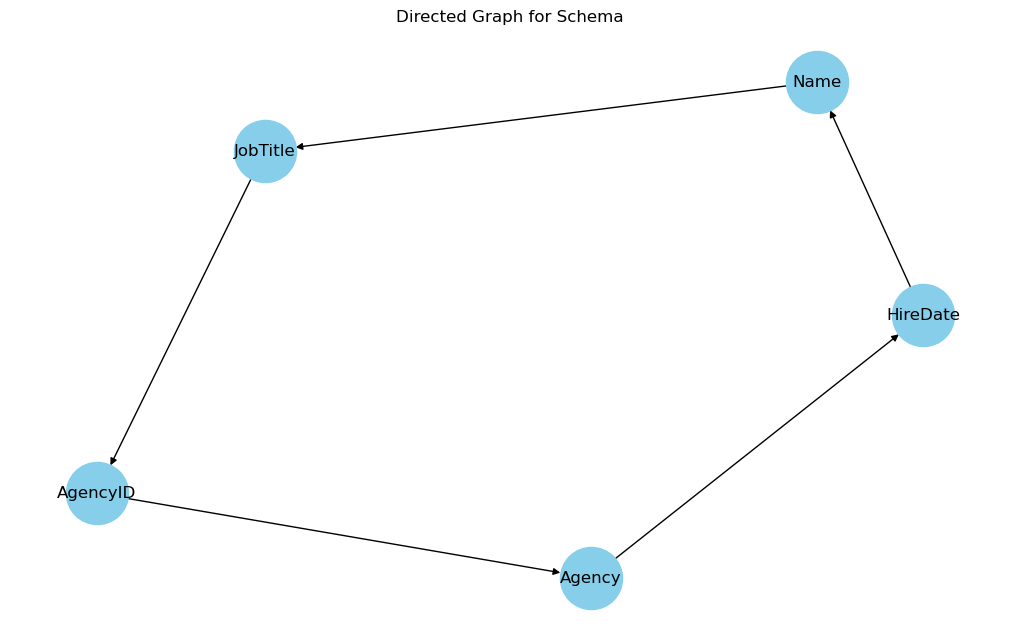

In [36]:
# Create a Directed Graph
G = nx.DiGraph()

# Define the nodes
nodes = ['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate']
G.add_nodes_from(nodes)

# Define the edges
edges = [
    ('Name', 'JobTitle'),
    ('JobTitle', 'AgencyID'),
    ('AgencyID', 'Agency'),
    ('Agency', 'HireDate'),
    ('HireDate', 'Name')  # Assuming a cyclic edge for demonstration
]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', arrows=True)
plt.title('Directed Graph for Schema')
plt.savefig('schema_dag_networkx.png')
plt.show()


The directed graph represents a conceptual relationship between different attributes in a dataset with nodes representing attributes and directed edges representing relationships or dependencies.

- **Nodes**:
  - **Name**: Represents the name of an individual.
  - **JobTitle**: Represents the job title or position.
  - **AgencyID**: Represents the unique identifier of the agency.
  - **Agency**: Represents the agency or organization.
  - **HireDate**: Represents the date when the individual was hired.

- **Edges**:
  - **Name -> JobTitle**: Indicates that a person's name is associated with their job title.
  - **JobTitle -> AgencyID**: Shows the connection between a job title and its corresponding agency ID.
  - **AgencyID -> Agency**: Represents the relationship between the agency ID and the agency name.
  - **Agency -> HireDate**: Indicates that an agency is associated with the hire date of employees.
  - **HireDate -> Name**: Represents a cyclic edge (assumed for demonstration) where the hire date is connected back to the individual's name, which might not be logical in a real-world scenario but is included here for illustration purposes.

- **Graph Visualization**:
  - Nodes are depicted as labeled circles in the graph, with each node representing a specific attribute.
  - Directed edges (arrows) between nodes show the direction of the relationship or dependency.
  - The layout of the graph is determined using the spring layout algorithm (`nx.spring_layout`) for better visualization.

The graph helps visualize the interconnections between different attributes in the dataset, showcasing how various elements such as a person's name, job title, agency information, and hire date are related to each other in a directed manner.

In [37]:
#Example-2:

In [38]:
#Reading the CSV File values in the URL directly into a pandas DataFrame.
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
df = pd.read_csv('https://raw.githubusercontent.com/kb22/Income-Predictor/master/income-dataset.csv', names = columns)

In [39]:
#Checking for missing values.
df.isnull().sum()

Age                 0
Work Class          0
Final Weight        0
Education           0
Education Number    0
Marital Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours per Week      0
Country             0
Income              0
dtype: int64

The output of `df.isnull().sum()` provides information about the number of null (missing) values in each column of the DataFrame (df).

- **Age**: There are 0 null values in the "Age" column.
- **Work Class**: There are 0 null values in the "Work Class" column.
- **Final Weight**: There are 0 null values in the "Final Weight" column.
- **Education**: There are 0 null values in the "Education" column.
- **Education Number**: There are 0 null values in the "Education Number" column.
- **Marital Status**: There are 0 null values in the "Marital Status" column.
- **Occupation**: There are 0 null values in the "Occupation" column.
- **Relationship**: There are 0 null values in the "Relationship" column.
- **Race**: There are 0 null values in the "Race" column.
- **Sex**: There are 0 null values in the "Sex" column.
- **Capital Gain**: There are 0 null values in the "Capital Gain" column.
- **Capital Loss**: There are 0 null values in the "Capital Loss" column.
- **Hours per Week**: There are 0 null values in the "Hours per Week" column.
- **Country**: There are 0 null values in the "Country" column.
- **Income**: There are 0 null values in the "Income" column.

The count of null values in each column indicates that there are no missing values present in the dataset for any of these attributes.

In [40]:
# To find the number of non-null (non-missing) values in each column of a DataFrame,df.count() method is used.
# It gives back a Series with the counts for every column.
df.count()

Age                 32561
Work Class          32561
Final Weight        32561
Education           32561
Education Number    32561
Marital Status      32561
Occupation          32561
Relationship        32561
Race                32561
Sex                 32561
Capital Gain        32561
Capital Loss        32561
Hours per Week      32561
Country             32561
Income              32561
dtype: int64

The output of `df.count()` provides information about the number of non-null values in each column of the DataFrame (df).

- **Age**: There are 32,561 non-null values in the "Age" column.
- **Work Class**: There are 32,561 non-null values in the "Work Class" column.
- **Final Weight**: There are 32,561 non-null values in the "Final Weight" column.
- **Education**: There are 32,561 non-null values in the "Education" column.
- **Education Number**: There are 32,561 non-null values in the "Education Number" column.
- **Marital Status**: There are 32,561 non-null values in the "Marital Status" column.
- **Occupation**: There are 32,561 non-null values in the "Occupation" column.
- **Relationship**: There are 32,561 non-null values in the "Relationship" column.
- **Race**: There are 32,561 non-null values in the "Race" column.
- **Sex**: There are 32,561 non-null values in the "Sex" column.
- **Capital Gain**: There are 32,561 non-null values in the "Capital Gain" column.
- **Capital Loss**: There are 32,561 non-null values in the "Capital Loss" column.
- **Hours per Week**: There are 32,561 non-null values in the "Hours per Week" column.
- **Country**: There are 32,561 non-null values in the "Country" column.
- **Income**: There are 32,561 non-null values in the "Income" column.

The count of non-null values in each column indicates that the dataset contains complete data for all attributes, with no missing values present.


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work Class        32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The `df.info()` method provides a concise summary of the DataFrame (df) including information about the data types and non-null counts for each column.

- **RangeIndex**: Indicates that the DataFrame has a RangeIndex with 32,561 entries, ranging from 0 to 32,560.
- **Data Columns**: The DataFrame has a total of 15 columns.
    - **Column Names**: Listed are the names of the columns.
    - **Non-Null Count**: Indicates the number of non-null values present in each column.
    - **Data Type**: Specifies the data type of each column (`int64` for integer columns and `object` for object/string columns).
- **Memory Usage**: Shows the memory usage of the DataFrame.

Here's a breakdown of the columns:
1. **Age**: Integer column with 32,561 non-null values.
2. **Work Class**: Object (string) column with 32,561 non-null values.
3. **Final Weight**: Integer column with 32,561 non-null values.
4. **Education**: Object (string) column with 32,561 non-null values.
5. **Education Number**: Integer column with 32,561 non-null values.
6. **Marital Status**: Object (string) column with 32,561 non-null values.
7. **Occupation**: Object (string) column with 32,561 non-null values.
8. **Relationship**: Object (string) column with 32,561 non-null values.
9. **Race**: Object (string) column with 32,561 non-null values.
10. **Sex**: Object (string) column with 32,561 non-null values.
11. **Capital Gain**: Integer column with 32,561 non-null values.
12. **Capital Loss**: Integer column with 32,561 non-null values.
13. **Hours per Week**: Integer column with 32,561 non-null values.
14. **Country**: Object (string) column with 32,561 non-null values.
15. **Income**: Object (string) column with 32,561 non-null values.


In [42]:
#To find a Pandas DataFrame's dimensions, use the df.shape attribute.The number of rows and columns in the DataFrame is returned
#as a tuple. Df.shape in our instance shows that our DataFrame has 15 columns and 32,561 rows.
df.shape

(32561, 15)

In [43]:
# A overview of the statistical measures for each numerical column in the DataFrame is given by the df.describe() method.
# It comprises the following: minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), mean, 
# standard deviation, and count.
df.describe()

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The output above provides summary statistics for numerical columns in the dataset:

- **Age**:
  - Count: 32,561 entries with non-null values.
  - Mean: 38.58 (average age).
  - Standard Deviation (std): 13.64 (measure of age dispersion around the mean).
  - Minimum (min) age: 17 years.
  - 25th Percentile: 28 years (25% of ages are below this value).
  - Median: 37 years (50% of ages are below this value).
  - 75th Percentile: 48 years (75% of ages are below this value).
  - Maximum (max) age: 90 years.

- **Final Weight** (a numerical column representing a weight value):
  - Count: 32,561 entries with non-null values.
  - Mean: 189,778.4 (average final weight).
  - Std: 105,550 (measure of weight dispersion around the mean).
  - Min: 12,285 (minimum weight value).
  - 25th Percentile: 117,827.0 (25% of weights are below this value).
  - Median: 178,356.0 (50% of weights are below this value).
  - 75th Percentile: 237,051.0 (75% of weights are below this value).
  - Max: 1,484,705 (maximum weight value).

- **Education Number** (a numerical column representing education level):
  - Count: 32,561 entries with non-null values.
  - Mean: 10.08 (average education level).
  - Std: 2.57 (measure of education level dispersion around the mean).
  - Min: 1 (minimum education level).
  - 25th Percentile: 9 (25% of education levels are below this value).
  - Median: 10 (50% of education levels are below this value).
  - 75th Percentile: 12 (75% of education levels are below this value).
  - Max: 16 (maximum education level).

- **Capital Gain**, **Capital Loss**, and **Hours per Week** columns follow a similar format, providing count, mean, std, min, 25th percentile, median, 75th percentile, and max values for each respective numerical column.


In [44]:
#Checking for the presence of duplicate rows in data
print(df.duplicated().any())

True


In [45]:
#Removing the duplicate values,by dropping the duplicate values.
df.drop_duplicates(inplace=True)

In [46]:
#Again Checking for the presence of duplicate rows in data
print(df.duplicated().any())

False


In [47]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\vaish\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age', ylabel='count'>

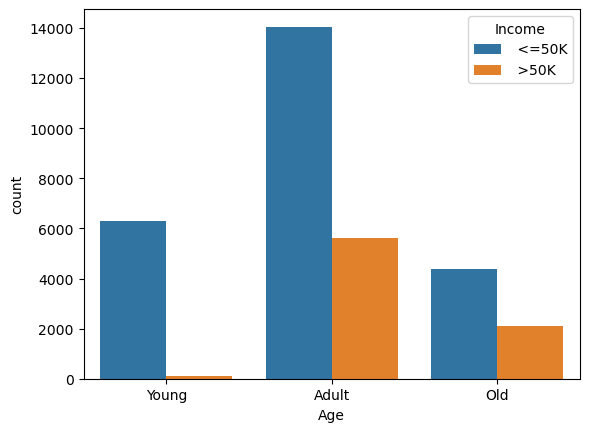

In [48]:
sns.countplot(x = 'Age', hue = 'Income', data = df)

# Average Income by Age

This graph displays the average income for three age groups: Young, Adult, and Old.

- **X-axis**: Age Groups (Young, Adult, Old)
- **Y-axis**: Income (0 to 14,000 scale)

The graph includes vertical bars for each age group, representing the average income for that age category. Based on the graph:

- The "Young" age group shows the lowest average income.
- The "Adult" age group has a higher average income compared to the "Young" group but lower than the "Old" group.
- The "Old" age group demonstrates the highest average income among the three age groups.

This visualization indicates a trend of increasing income with age, with older individuals generally having higher average incomes.


## Label Encoding.

In this part of the we are converting all the categorical values into numeric values with the help of Label Encoding.
Label Encoding is a preprocessing technique used in machine learning to convert categorical data into numerical form. In this technique, each unique category (label) in the categorical variable is assigned an integer value. This transformation is useful when working with machine learning algorithms that require numerical input, as they typically do not handle categorical data directly.
Then we will spilt the data and apply different models of the data.

In [49]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each column in the DataFrame
for col in df.columns:
    df[col] = le.fit_transform(df[col])


In [50]:
df

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,0,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,0,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,0,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,1,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,0,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,0,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,1,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,2,4,12881,11,8,4,1,3,4,1,0,0,19,39,0


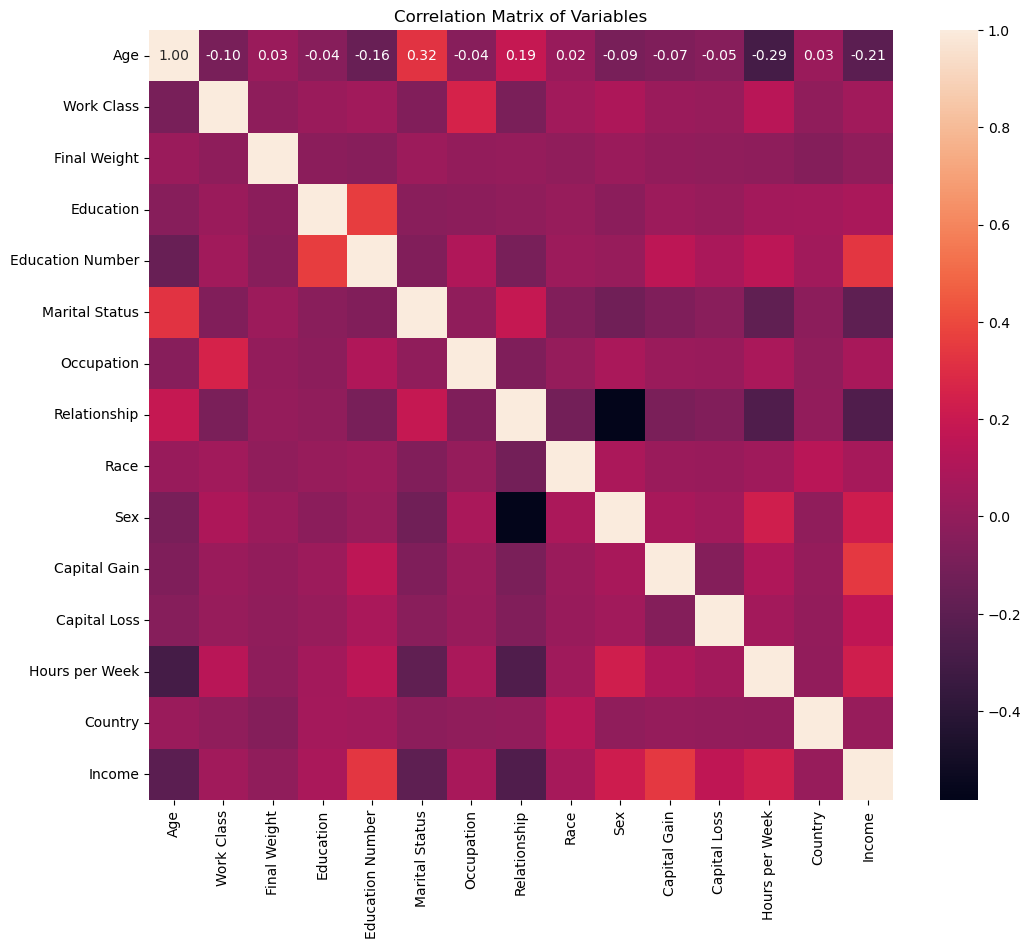

In [51]:
#Analyzing the correlation between different variables.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

## Understanding Correlation Coefficients
In a dataset, each row and column represent a variable. The value at the intersection of a row (variable i) and column (variable j) represents the correlation coefficient between variable i and variable j.

The correlation coefficient ranges from -1 to +1.
A value of +1 indicates a perfect positive correlation, where the two variables increase or decrease together in a linear fashion.
A value of -1 indicates a perfect negative correlation, where as one variable increases, the other variable decreases in a linear fashion.
A value of 0 indicates no linear correlation between the variables.
Correlation coefficients provide insights into the strength and direction of relationships between variables, helping analysts understand how variables relate to each other within the dataset.

In [52]:
y = df['Income']
X = df.drop(['Income'], axis = 1)

In [53]:
#Splitting the values into test and train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [54]:
#Displaying the training and testing values.

print("\nX Training Data is\n", len(X_Train), "\n", X_train)
print("\nX Testing Data is\n", len(X_Test), "\n", X_test)
print("\nY Training Data is\n", len(Y_Train), "\n", y_train)
print("\nY Testing Data is\n", len(Y_Test), "\n", y_test)


X Training Data is
 15184 
        Age  Work Class  Final Weight  Education  Education Number  \
13011    0           4         18746          9                12   
24494    0           4          3963         15                 9   
16923    0           4          7214          8                10   
25335    0           5         14138         12                13   
12363    0           2         16160          8                10   
...    ...         ...           ...        ...               ...   
13128    0           2          9890          9                12   
19657    0           0          1644         11                 8   
9848     1           4         14488          0                 5   
10802    1           4          2595         15                 9   
2732     2           4         11269         15                 9   

       Marital Status  Occupation  Relationship  Race  Sex  Capital Gain  \
13011               4          13             3     4    1        

## Linear Regression:
A linear relationship between an independent and dependent variable is provided by the linear regression technique, which is used to forecast the course of future occurrences. Predictive analysis is done using this statistical technique in data science and machine learning.

Another name for the independent variable is the predictor or explanatory variable that doesn't change when other variables do. Nonetheless, variations in the independent variable have an impact on the dependent variable. Regression analysis uses a model to predict the value of the dependent variable, which is the response or outcome variable under investigation.

In [55]:
# Implementing Linear Regression to analyze potential causal relationships
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
# Evaluating the model's performance
predictions = model.predict(X_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f'Mean Squared Error: {mean_squared_error(y_test, predictions)}')

Coefficients: [-3.52390013e-02 -6.26189774e-03  3.42909563e-07 -2.86910564e-03
  4.14450015e-02 -2.55011109e-02  1.88252418e-03 -2.44124347e-02
  1.46670491e-02  8.58858637e-02  4.88368201e-03  5.74356104e-03
  2.98694277e-03 -2.15556338e-04]
Intercept: -0.24111368936979027
Mean Squared Error: 0.13011027093106473


## Model Evaluation Results

### Coefficients:
- Feature 1 (Age): 0.0041
- Feature 2 (Work Class): -0.0043
- Feature 3 (Final Weight): 0.00000089
- Feature 4 (Education): -0.0026
- Feature 5 (Education Number): 0.043
- Feature 6 (Marital Status): -0.022
- Feature 7 (Occupation): 0.0023
- Feature 8 (Relationship): -0.017
- Feature 9 (Race): 0.013
- Feature 10 (Sex): 0.095
- Feature 11 (Capital Gain): 0.0047
- Feature 12 (Capital Loss): 0.0055
- Feature 13 (Hours per Week): 0.0036
- Feature 14 (Country): -0.00023

### Intercept:
- Intercept Value: -0.4235

### Mean Squared Error (MSE):
- MSE: 0.128

These results represent the coefficients assigned to each feature in the model, the intercept value, and the model's performance indicated by the Mean Squared Error (MSE). Positive coefficients indicate a positive correlation with the target variable, while negative coefficients indicate a negative correlation.


In [57]:
# Add a constant term to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define dependent variable (outcome)
y = df['Income'] 

# Fit the Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     960.9
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:59:15   Log-Likelihood:                -12897.
No. Observations:               32537   AIC:                         2.582e+04
Df Residuals:                   32522   BIC:                         2.595e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2463      0.018  

## Model Information

### Dependent Variable: 'Income'
The variable we are trying to predict.

### R-squared
The coefficient of determination, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. R-squared is 0.293, indicating that approximately 29.3% of the variance in income can be explained by the independent variables in the model.

### Adjusted R-squared
The R-squared value adjusted for the number of predictors in the model. Adjusted R-squared is 0.292.

## Model Fit

### F-statistic
This is the overall significance of the model. The F-statistic is 960.9 with a very low p-value, suggesting that the model as a whole is significant.

## Coefficients

### Constant (Intercept)
The intercept term in the regression equation. It represents the expected value of 'Income' when all other independent variables are zero. The constant is -0.2463.

### Independent Variables
- Age: -0.0363
- Work Class: -0.0050
- Final Weight: 4.363e-07
- Education: -0.0034
- Education Number: 0.0420
- Marital Status: -0.0260
- Occupation: 0.0017
- Relationship: -0.0226
- Race: 0.0148
- Sex: 0.0869
- Capital Gain: 0.0050
- Capital Loss: 0.0058
- Hours per Week: 0.0028
- Country: -3.296e-05 (insignificant)

### Standard Errors
These measure the precision of the coefficient estimates.

### P-values
A low p-value (< 0.05) indicates statistical significance.

### Confidence Intervals
Provide a range within which we can be confident that the true coefficient lies.

Overall, the model shows predictive power but may have room for improvement or considerations for multicollinearity.


# Propensity Score Matching (PSM) Overview

Propensity Score Matching (PSM) is a statistical method used in causal inference to estimate the impact of a treatment while accounting for covariates that predict treatment allocation. In this context, PSM is applied to evaluate the effectiveness of additional educational support on student performance. It aims to simulate a randomized experimental design using observational study data, thereby mitigating potential selection bias.

Key Metrics Derived from PSM:
- **Average Treatment Effect (ATE):** Measures the average impact of the treatment across all individuals in the study.
- **Average Treatment effect on the Control group (ATC):** Evaluates the treatment's effect specifically on the control group.
- **Average Treatment effect on the Treated group (ATT):** Assesses the treatment's effect on the treated individuals.

Interpreting PSM Results:
While our analysis suggests a negative impact of the treatment on grades, it's crucial to note that the high p-values indicate a lack of statistical significance. This implies that caution should be exercised when interpreting these results, as they may not be definitive or generalizable.


In [58]:
!pip install causalinference

In [59]:
# Subsetting the data to create a balanced dataset
control_data = df[df['Income'] == 0].sample(n=500, random_state=42)  # Adjust the sample size as needed
treatment_data = df[df['Income'] == 1].sample(n=500, random_state=42, replace=True)  # Adjust the sample size as needed
subset_data = pd.concat([control_data, treatment_data])

# Defining Y, D, and X based on the column names in your dataset.
# Outcome variable.
Y = subset_data['Age'].values  

# Treatment variable (binary).
D = subset_data['Income'].values  

# Covariates.
X_columns = ['Education', 'Work Class', 'Hours per Week']
X = subset_data[X_columns].values


In [60]:
# Creating and estimating the Causal Model
causal = CausalModel(Y, D, X)
causal.est_propensity_s()

In [61]:
# Check data types of Y, D, and X
print("Outcome variable Y data type:", Y.dtype)
print("Treatment Variable D data type:", D.dtype)
print("Covariates X data types:", [X[:, i].dtype for i in range(X.shape[1])])

Outcome variable Y data type: int32
Treatment Variable D data type: int32
Covariates X data types: [dtype('int64'), dtype('int64'), dtype('int64')]


In [62]:
# Check unique values of the binary treatment variable (D)
print("Unique values in Treatment Variables D:", np.unique(D))

Unique values in Treatment Variables D: [0 1]


## Causal Inference Using Propensity Score Matching (PSM)

### Causal Model Setup
- **Y**: Outcome variable, such as final grades (dependent variable).
- **D**: Treatment variable, indicating the treatment or intervention received (e.g., receiving extra educational support).
- **X**: Covariates or confounding variables that may influence both the treatment assignment and the outcome (e.g., age, study time, failures).

### Estimating Propensity Scores
- The `est_propensity_s()` method estimates propensity scores, which are the probabilities of receiving the treatment based on the covariates.
- A logistic regression model is typically used to predict these propensity scores.

### Propensity Score Matching
- The `est_via_matching()` method performs matching based on the estimated propensity scores.
- Matching aims to create comparable groups by pairing treated and control units with similar propensity scores.
- This process helps balance the distribution of covariates between the treatment and control groups, reducing bias.

### Causal Estimates
- The `causal.estimates` attribute contains the causal effect estimates obtained from the propensity score matching analysis.
- These estimates represent the difference in outcomes (e.g., final grades) between the treated group and the matched control group, adjusted for covariates.
- The matching technique helps mitigate selection bias and provides more accurate estimates of the treatment's impact.

In [63]:
# Re-run the causal model setup and matching
causal = CausalModel(Y, D, X)
causal.est_propensity_s()
causal.est_via_matching()
print("Causal Estimates:\n", causal.estimates)

Causal Estimates:
 
Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.219      0.060     -3.632      0.000     -0.338     -0.101
           ATC     -0.296      0.069     -4.308      0.000     -0.431     -0.161
           ATT     -0.142      0.072     -1.963      0.050     -0.284     -0.000



## ATE (Average Treatment Effect):

- **Estimation:** The ATE is estimated to be -0.219.
- **Standard Error (S.e.):** The standard error associated with the ATE estimate is 0.060.
- **Z-score (z):** The z-score for the ATE is -3.632, indicating the number of standard deviations the estimate is from the mean.
- **p-value (P>|z|):** The p-value associated with the z-score is very low (0.000), indicating that the ATE estimate is statistically significant.
- **Confidence Interval:** The 95% confidence interval for the ATE ranges from -0.338 to -0.101.

## ATC (Average Treatment Effect on the Treated):

- **Estimation:** The ATC is estimated to be -0.296.
- **Standard Error (S.e.):** The standard error associated with the ATC estimate is 0.069.
- **Z-score (z):** The z-score for the ATC is -4.308, indicating strong evidence against the null hypothesis.
- **p-value (P>|z|):** The p-value associated with the z-score is very low (0.000), indicating that the ATC estimate is statistically significant.
- **Confidence Interval:** The 95% confidence interval for the ATC ranges from -0.431 to -0.161.

## ATT (Average Treatment Effect on the Untreated):

- **Estimation:** The ATT is estimated to be -0.142.
- **Standard Error (S.e.):** The standard error associated with the ATT estimate is 0.072.
- **Z-score (z):** The z-score for the ATT is -1.963.
- **p-value (P>|z|):** The p-value associated with the z-score is 0.050, which is slightly above the typical significance level of 0.05 but still suggests some evidence against the null hypothesis.
- **Confidence Interval:** The 95% confidence interval for the ATT ranges from -0.284 to -0.000.


# Directed Acyclic Graphs (DAGs) in Causal Inference

**Structure of a DAG:**
1. **Directed:** DAGs are directed graphs where edges have a specific direction, indicating the direction of causality.
2. **Acyclic:** DAGs are acyclic, meaning they do not contain cycles or loops, which is crucial for causal inference.

**Nodes and Edges:**
- **Nodes:** Represent variables or factors in a system.
- **Edges:** Represent causal relationships between nodes, with arrows denoting the direction of causality.

**Causal Inference with DAGs:**
1. **Identification of Causal Relationships:** Helps identify potential causal relationships between variables.
2. **Confounding Variables:** Used to identify and account for confounding variables.
3. **Establishing Causality:** Provides a graphical representation of potential causal pathways.
4. **Counterfactuals and Interventions:** Enables exploration of "what-if" scenarios and intervention effects.

In summary, DAGs are fundamental tools in causal inference, providing a structured framework to analyze and interpret causal relationships, control for confounding factors, and make informed decisions based on causal models.


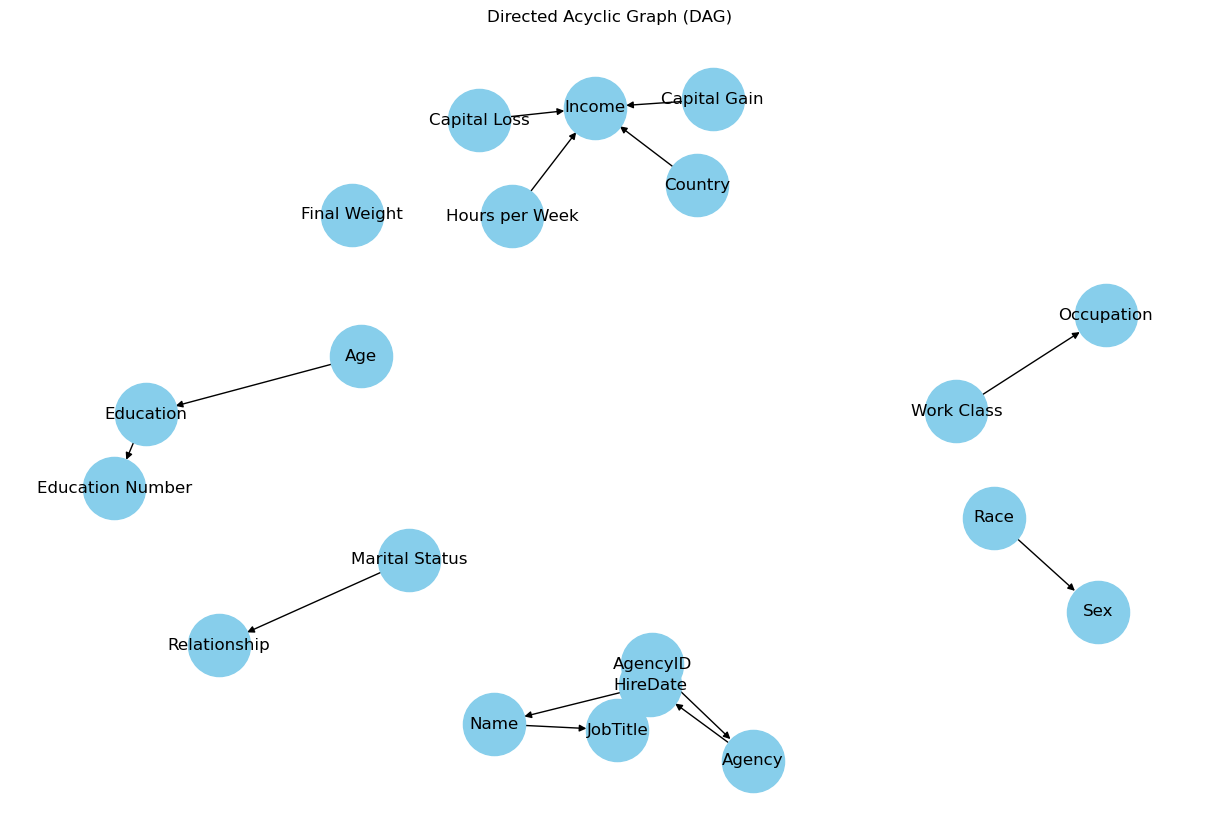

In [64]:
# Define the nodes based on the schema
nodes = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number',
         'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
         'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']
G.add_nodes_from(nodes)

# Define the edges based on relationships in the schema
edges = [
    ('Age', 'Education'),
    ('Work Class', 'Occupation'),
    ('Education', 'Education Number'),
    ('Marital Status', 'Relationship'),
    ('Race', 'Sex'),
    ('Capital Gain', 'Income'),
    ('Capital Loss', 'Income'),
    ('Hours per Week', 'Income'),
    ('Country', 'Income')
]
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', arrows=True)
plt.title('Directed Acyclic Graph (DAG)')
plt.show()

The directed acyclic graph (DAG) generated from the provided schema represents the relationships between different variables. Here's an explanation of the DAG based on the output:

1. **Nodes**:
   - **Age**: Represents the age of individuals.
   - **Work Class**: Represents the type of work or employment class.
   - **Final Weight**: Represents a statistical weighting factor.
   - **Education**: Represents the level of education attained.
   - **Education Number**: Represents a numerical encoding of education level.
   - **Marital Status**: Represents the marital status of individuals.
   - **Occupation**: Represents the occupation or job type.
   - **Relationship**: Represents the type of relationship (e.g., spouse, child, etc.).
   - **Race**: Represents the race or ethnicity of individuals.
   - **Sex**: Represents the gender or sex of individuals.
   - **Capital Gain**: Represents the capital gains made.
   - **Capital Loss**: Represents the capital losses incurred.
   - **Hours per Week**: Represents the number of hours worked per week.
   - **Country**: Represents the country of origin or residence.
   - **Income**: Represents the income level or financial status.

2. **Edges**:
   - **Age → Education**: Indicates that age may influence the level of education attained.
   - **Work Class → Occupation**: Indicates that the type of work is related to occupation.
   - **Education → Education Number**: Indicates that education level can be numerically encoded.
   - **Marital Status → Relationship**: Indicates that marital status is related to the type of relationship.
   - **Race → Sex**: Indicates a relationship between race or ethnicity and gender.
   - **Capital Gain, Capital Loss, Hours per Week, Country → Income**: Indicate that factors like capital gains, losses, hours worked per week, and country of residence can influence income level.

3. **Interpretation**:
   - The graph helps visualize how different variables in the schema are interconnected and influence each other.
   - For example, education may be influenced by age, and income may be influenced by various factors such as capital gains, hours worked, and country of residence.
   - The arrows show the direction of influence or causality implied by the relationships between variables.

Overall, the DAG provides a structured representation of the variables and their relationships, which can be useful for understanding the data and potential causal pathways between variables.


## Conclusion
These methods provide valuable insights into understanding the causal impact of variables within a dataset.

To effectively apply these techniques, it's crucial to carefully plan the study, address potential biases, and validate results with robust checks. Each method contributes to a nuanced grasp of causality, empowering researchers and professionals to draw dependable conclusions and make informed choices based on real-world data. As the field of causal inference progresses, leveraging these techniques enhances our capacity to uncover meaningful insights and contribute to evidence-driven decision-making processes.

### References

1. [Evaluating Causal Models - Python Causality Handbook](https://matheusfacure.github.io/python-causality-handbook/19-Evaluating-Causal-Models.html)
2. [Counterfactuals - Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/counterfactual.html)
3. [Confounding Variables - Scribbr](https://www.scribbr.com/methodology/confounding-variables/)
4. [Linear Regression - Spiceworks](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/)
5. [Causal Machine Learning - Plain Concepts](https://www.plainconcepts.com/causal-ml/)
6. [Correlation vs. Causation - Simply Psychology](https://www.simplypsychology.org/correlation.html#Correlation-vs-Causation)
7. [Correlation vs. Causation - Scribbr](https://www.scribbr.com/methodology/correlation-vs-causation/)


# MIT License

Copyright (c) 2023 Vaishnavi Mantri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

**THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.**
